In [1]:
import numpy as np
import pandas as pd
import glob
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**导入数据**

In [2]:
wine_data_path = "./winequality_dataset/"
print(os.listdir(wine_data_path))

['test.csv', 'train.csv']


In [3]:
wine_train_data_path = os.path.join(wine_data_path,"train.csv")

In [4]:
wine_train_data_df = pd.read_csv(wine_train_data_path,header=0)

In [5]:
wine_train_data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8
1,6.2,0.20,0.49,1.6,0.065,17.0,143.0,0.99370,3.22,0.52,9.2,6
2,7.1,0.23,0.35,16.5,0.040,60.0,171.0,0.99900,3.16,0.59,9.1,6
3,7.5,0.20,0.47,16.9,0.052,51.0,188.0,0.99944,3.09,0.62,9.3,5
4,7.0,0.15,0.38,15.3,0.045,54.0,120.0,0.99750,3.18,0.42,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3392,8.0,0.20,0.30,8.1,0.037,42.0,130.0,0.99379,3.10,0.67,11.8,6
3393,5.5,0.31,0.29,3.0,0.027,16.0,102.0,0.99067,3.23,0.56,11.2,6
3394,6.4,0.15,0.36,1.8,0.034,43.0,150.0,0.99220,3.42,0.69,11.0,8
3395,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7


**查看数据信息**

In [6]:
wine_train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 12 columns):
fixed acidity           3397 non-null float64
volatile acidity        3397 non-null float64
citric acid             3397 non-null float64
residual sugar          3397 non-null float64
chlorides               3397 non-null float64
free sulfur dioxide     3397 non-null float64
total sulfur dioxide    3397 non-null float64
density                 3397 non-null float64
pH                      3397 non-null float64
sulphates               3397 non-null float64
alcohol                 3397 non-null float64
quality                 3397 non-null int64
dtypes: float64(11), int64(1)
memory usage: 318.6 KB


**空值检查**

In [7]:
# 空值检查
wine_train_data_df[wine_train_data_df.isnull().values==True]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [8]:
wine_train_data_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**查看数值**

In [9]:
# 查看数值
wine_train_data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000
mean,6.859773,0.275664,0.335443,6.352252,0.046149,35.359729,138.346924,0.994033,3.190783,0.489491,10.507908,5.876656
std,0.848985,0.098731,0.119813,5.033802,0.023082,16.614922,42.132964,0.002979,0.152126,0.114323,1.225869,0.879239
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.770000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991800,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.300000,6.000000
75%,7.300000,0.320000,0.390000,9.800000,0.050000,46.000000,168.000000,0.996050,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,138.500000,344.000000,1.038980,3.820000,1.060000,14.200000,9.000000


**查看类别**

In [10]:
wine_train_data_df["quality"].unique()

array([8, 6, 5, 7, 4, 9, 3], dtype=int64)

6    1535
5    1024
7     593
8     125
4     104
3      13
9       3
Name: quality, dtype: int64


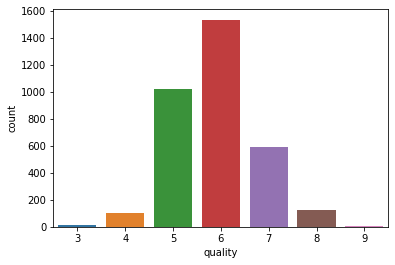

In [11]:
print(wine_train_data_df["quality"].value_counts())
sns.countplot(x="quality",data=wine_train_data_df)

In [12]:
wine_train_data_df.groupby("quality").size()

quality
3      13
4     104
5    1024
6    1535
7     593
8     125
9       3
dtype: int64

**查看属性排名最高的几行**

In [13]:
# 最高的alcohol含量
print("Top5 alcohol content:")
wine_train_data_df.sort_values("alcohol",ascending=False).iloc[:5]

Top5 alcohol content:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
472,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7
120,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7
2610,5.8,0.29,0.21,2.6,0.025,12.0,120.0,0.98940,3.39,0.79,14.00,7
2804,4.9,0.33,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.00,8
2627,5.8,0.24,0.28,1.4,0.038,40.0,76.0,0.98711,3.10,0.29,13.90,7


**查看属性之间的相关系数**

In [14]:
# 计算相关系数
wine_train_data_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.001007,0.296248,0.080101,0.025129,-0.053510,0.081641,0.256132,-0.423238,-0.001652,-0.113055,-0.116689
volatile acidity,-0.001007,1.000000,-0.138643,0.081810,0.094936,-0.099797,0.101455,0.042279,-0.065624,-0.040935,0.069532,-0.184266
citric acid,0.296248,-0.138643,1.000000,0.093623,0.093352,0.091084,0.109358,0.147776,-0.165378,0.066310,-0.071174,-0.011403
residual sugar,0.080101,0.081810,0.093623,1.000000,0.076908,0.307869,0.400413,0.833163,-0.182580,-0.035320,-0.430310,-0.080444
chlorides,0.025129,0.094936,0.093352,0.076908,1.000000,0.101906,0.203341,0.247203,-0.091267,0.030587,-0.348485,-0.201998
free sulfur dioxide,-0.053510,-0.099797,0.091084,0.307869,0.101906,1.000000,0.612379,0.300026,-0.009207,0.040965,-0.257723,0.013863
total sulfur dioxide,0.081641,0.101455,0.109358,0.400413,0.203341,0.612379,1.000000,0.528271,-0.000375,0.130207,-0.449674,-0.161823
density,0.256132,0.042279,0.147776,0.833163,0.247203,0.300026,0.528271,1.000000,-0.076752,0.086156,-0.768759,-0.291202
pH,-0.423238,-0.065624,-0.165378,-0.182580,-0.091267,-0.009207,-0.000375,-0.076752,1.000000,0.164000,0.106808,0.098492
sulphates,-0.001652,-0.040935,0.066310,-0.035320,0.030587,0.040965,0.130207,0.086156,0.164000,1.000000,-0.033326,0.039040


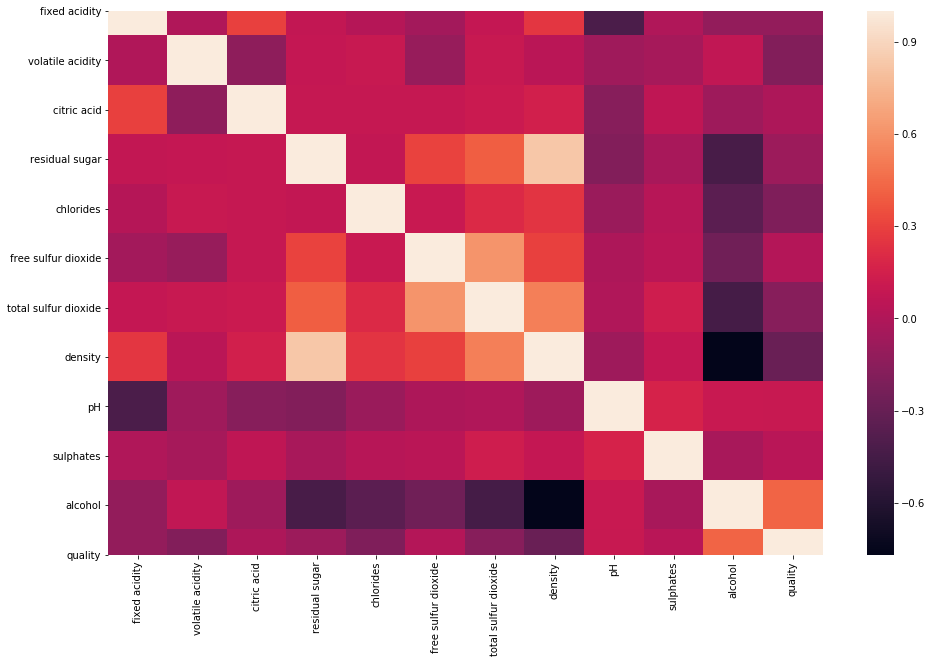

In [15]:
# 画出热力图
corr = wine_train_data_df.corr()

plt.figure(figsize=(16,10))
g = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

**联合图**

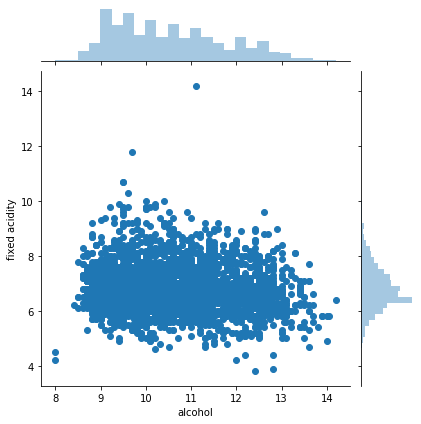

In [16]:
# 联合图
sns.jointplot(x="alcohol",y="fixed acidity",data=wine_train_data_df)

**属性之间的箱型图**

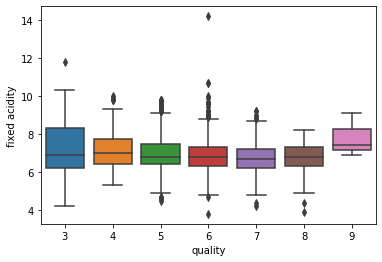

In [17]:
sns.boxplot(x="quality",y="fixed acidity",data=wine_train_data_df)

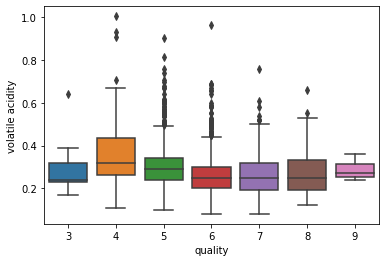

In [18]:
sns.boxplot(x="quality",y="volatile acidity",data=wine_train_data_df)

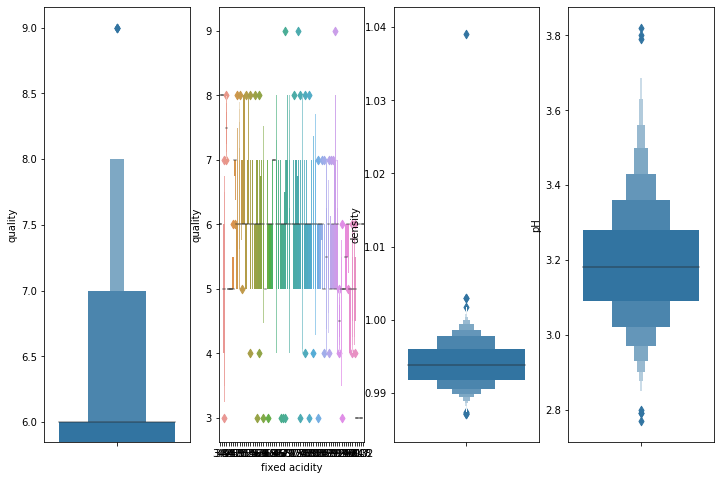

In [19]:
# 箱型图
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels="quality",rotation=90)
sns.boxenplot(y="quality",data=wine_train_data_df)

ax1 = fig.add_subplot(1,4,2)
sns.boxenplot(x="fixed acidity",y="quality",data=wine_train_data_df)

ax1 = fig.add_subplot(1,4,3)
sns.boxenplot(y="density",data=wine_train_data_df)

ax1 =fig.add_subplot(1,4,4)
sns.boxenplot(y="pH",data=wine_train_data_df)

**对图**

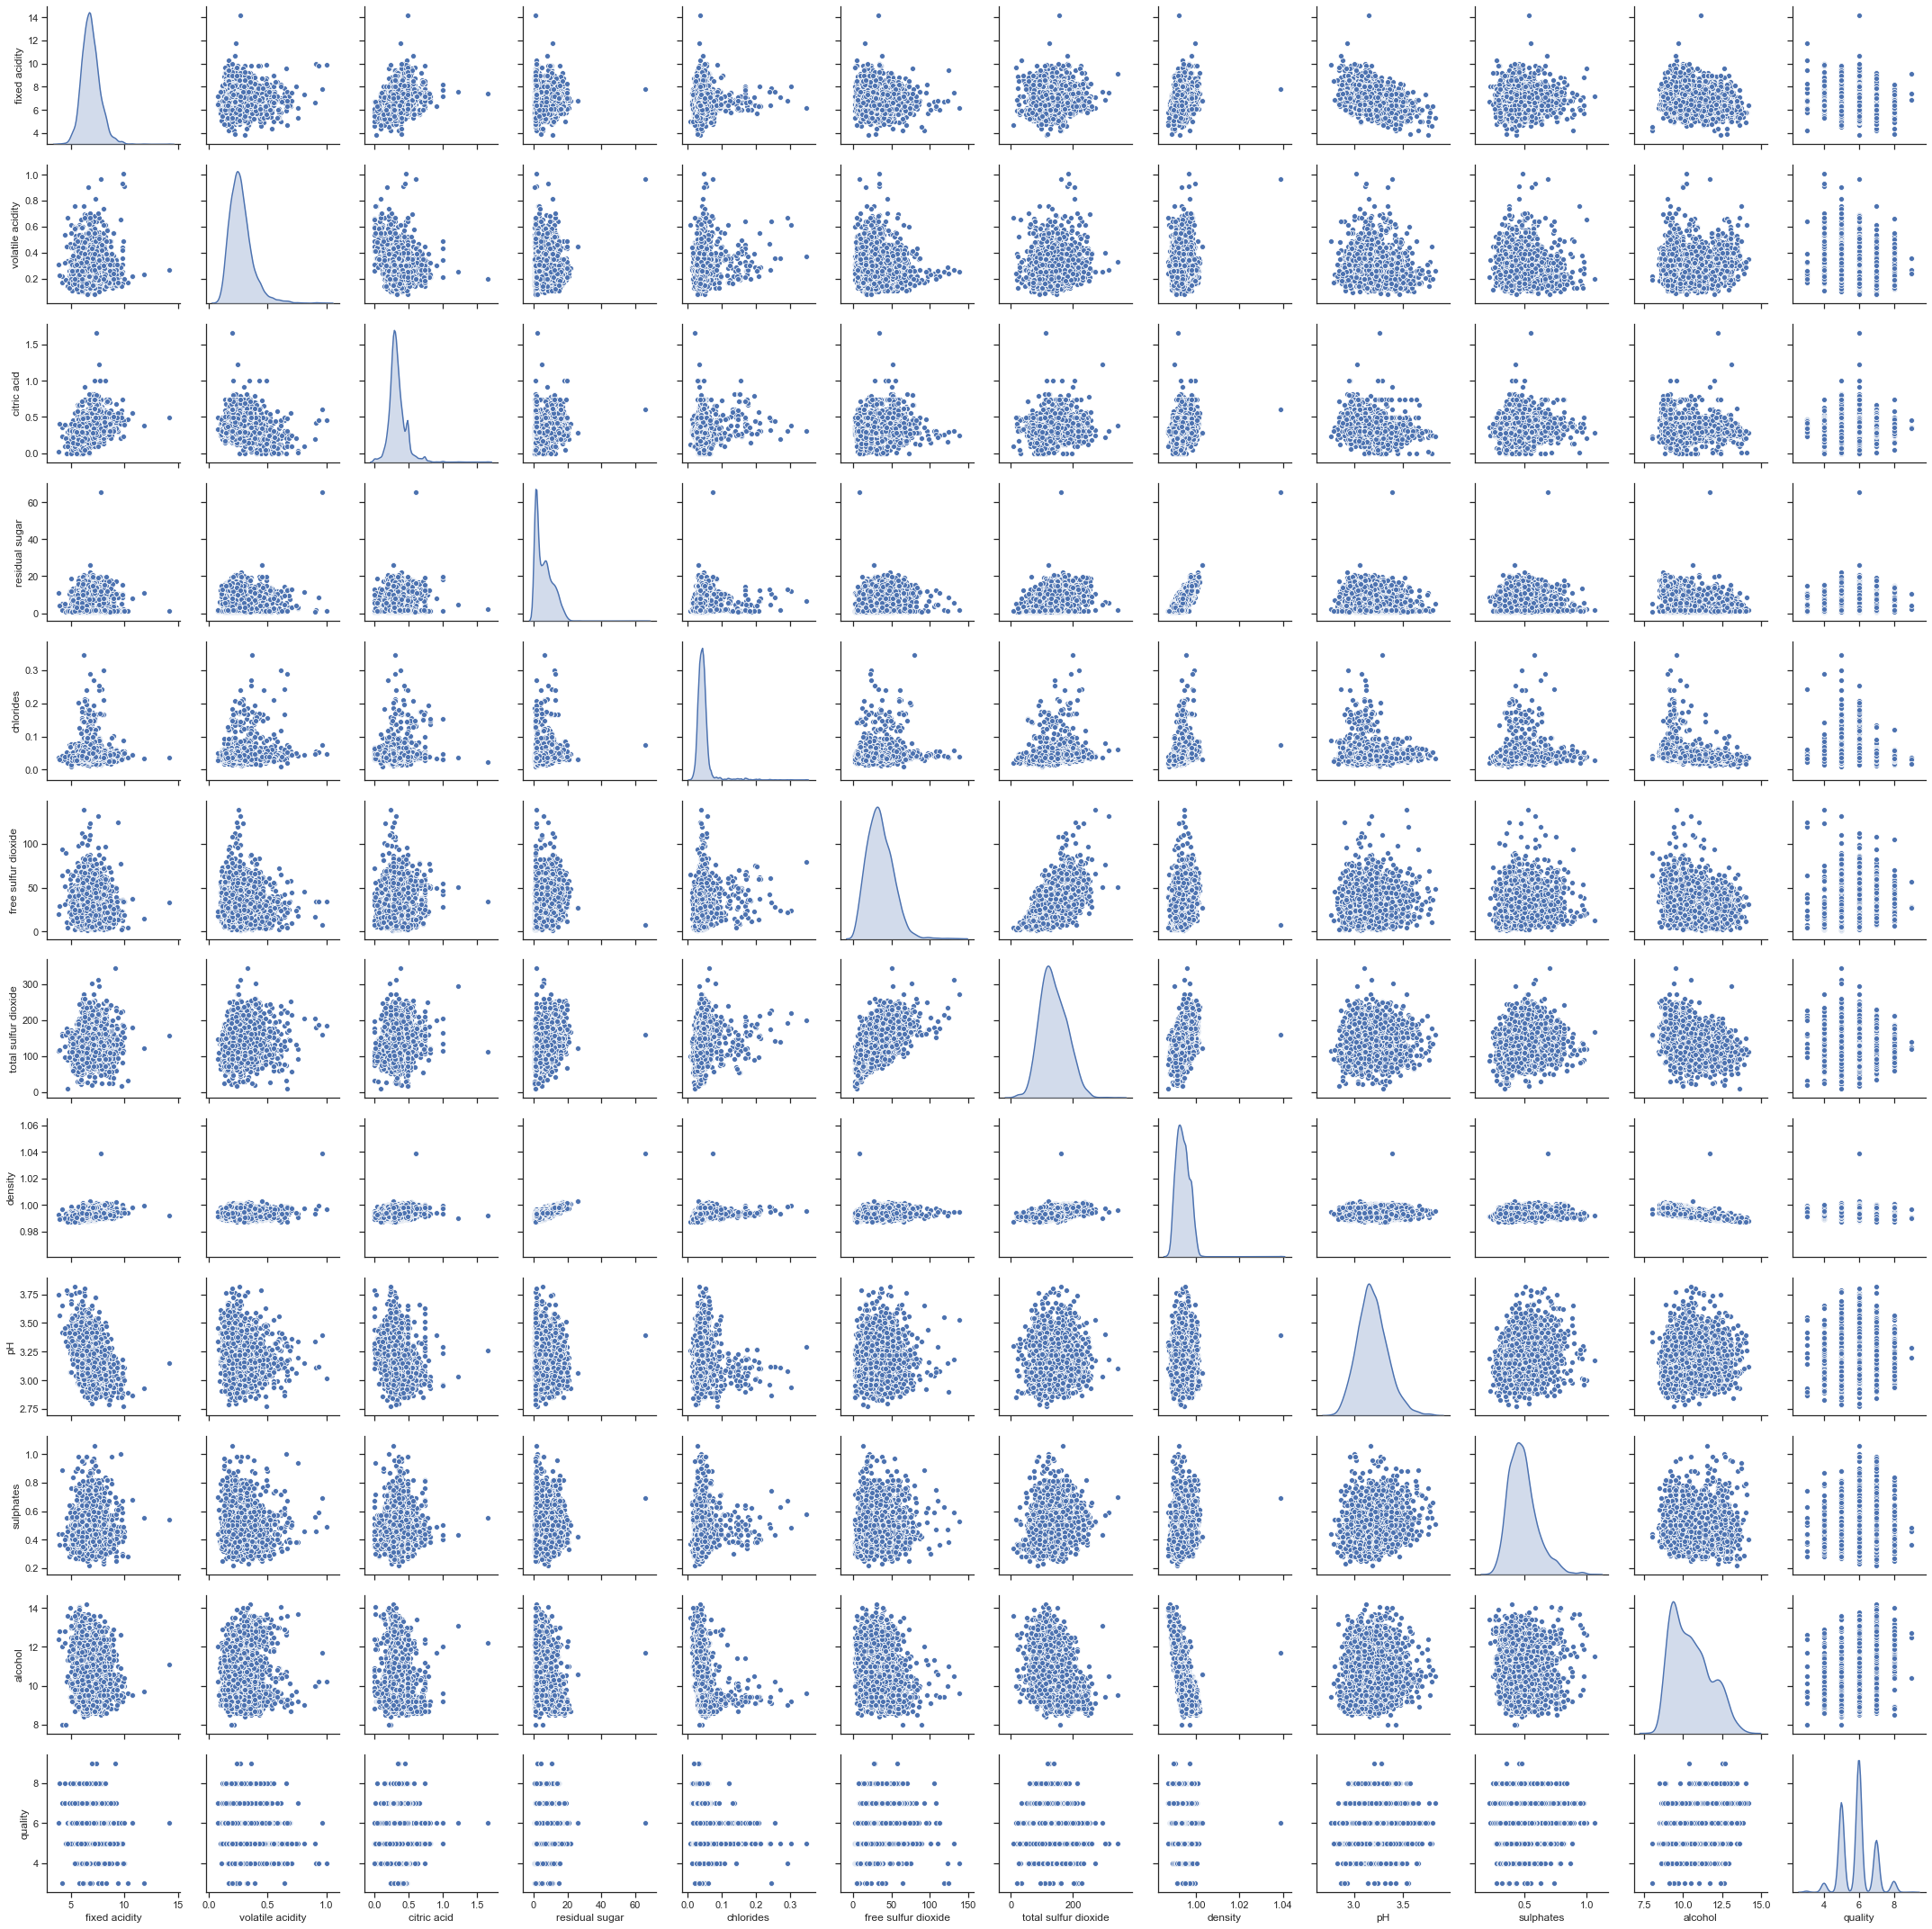

In [20]:
# 对图
sns.set(style="ticks",color_codes=True)
g = sns.pairplot(wine_train_data_df,diag_kind="kde")

**属性之间的柱状图**

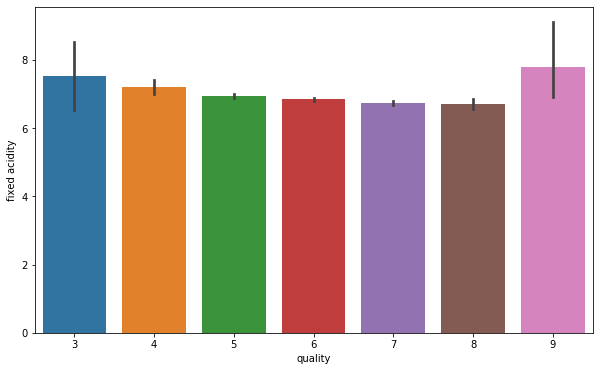

In [16]:
# EDA
fig = plt.figure(figsize=(10,6))
sns.barplot(x="quality",y="fixed acidity",data=wine_train_data_df)